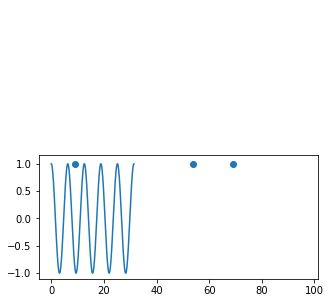

In [14]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np



def randn_point():
    # 产生随机散点图的x和y数据
    x=np.random.randint(1,100,3)
    y=np.random.randint(1,2,3)
    return x,y

# 创建画布，包含2个子图
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# 先绘制初始图形，每个子图包含1个正弦波和三个点的散点图
x = np.arange(0, 10*np.pi, 0.01)

line1, = ax1.plot(x, np.sin(x)) # 正弦波
x1,y1=randn_point()
sca1 = ax1.scatter(x1,y1)   # 散点图

line2, = ax2.plot(x, np.cos(x))  # 余弦波
x2,y2=randn_point()
sca2 = ax2.scatter(x2,y2)   # 散点图

def init():
    # 构造开始帧函数init
    # 改变y轴数据，x轴不需要改
    line1.set_ydata(np.sin(x))
    line1.set_ydata(np.cos(x))
    # 改变散点图数据
    x1, y1 = randn_point()
    x2, y2 = randn_point()
    data1 = [[x,y] for x,y in zip(x1,y1)]
    data2 = [[x, y] for x, y in zip(x2, y2)]
    sca1.set_offsets(data1)  # 散点图
    sca2.set_offsets(data2)  # 散点图
    label = 'timestep {0}'.format(0)
    ax1.set_xlabel(label)
    return line1,line2,sca1,sca2,ax1  # 注意返回值，我们要更新的就是这些数据

def animate(i):
    # 接着，构造自定义动画函数animate，用来更新每一帧上各个x对应的y坐标值，参数表示第i帧
    # plt.cla() 这个函数很有用，先记着它
    line1.set_ydata(np.sin(x + i/10.0))
    line2.set_ydata(np.cos(x + i / 10.0))
    x1, y1 = randn_point()
    x2, y2 = randn_point()
    data1 = [[x,y] for x,y in zip(x1,y1)]
    data2 = [[x, y] for x, y in zip(x2, y2)]
    sca1.set_offsets(data1)  # 散点图
    sca2.set_offsets(data2)  # 散点图
    label = 'timestep {0}'.format(i)
    ax1.set_xlabel(label)
    return line1,line2,sca1,sca2,ax1


# 接下来，我们调用FuncAnimation函数生成动画。参数说明：
# fig 进行动画绘制的figure
# func 自定义动画函数，即传入刚定义的函数animate
# frames 动画长度，一次循环包含的帧数
# init_func 自定义开始帧，即传入刚定义的函数init
# interval 更新频率，以ms计
# blit 选择更新所有点，还是仅更新产生变化的点。应选择True，但mac用户请选择False，否则无法显示动画

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=100,
                              init_func=init,
                              interval=20,
                              blit=True)
plt.show()